# Image Recognition PyTorch

## Image Transforms

In [1]:
# !pip install torch torchvision

In [2]:
import torch 
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
transform = transforms.Compose([transforms.ToTensor(), #transform 0 to 1 
                               transforms.Normalize((0.5,),(0.5,))]) #mean = 0.5 ,std = 0.5
training_dataset = datasets.MNIST(root='/Users/MacBook/Documents/DeepLearning/Sesssion_1',train = True, download=True, transform = transform)
validation_dataset = datasets.MNIST(root='/Users/MacBook/Documents/DeepLearning/Sesssion_1',train = False, download=True, transform = transform)

training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size=100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size=100, shuffle = False)

In [4]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0) #(1,28,28) to (28,28,1)
    print(image.shape)
    image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)) #reverse to standardization
    image = image.clip(0,1)
    return image

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)


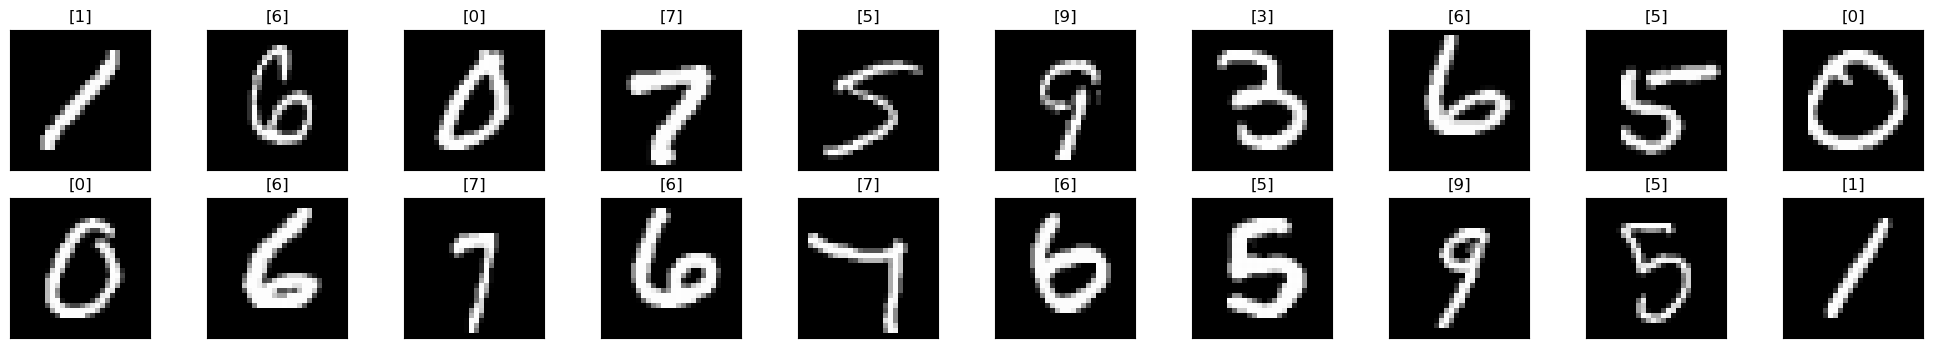

In [5]:
dataiter = iter(training_loader) 
images, labels = next(dataiter)
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
    ax = fig.add_subplot(2,10,idx+1,xticks =[], yticks = [])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

## Neural Network Implementation

In [6]:
from torch import nn
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x) # apply CrossEntropy to this score
        return x

In [7]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01) #0.01 to 0.0001

In [9]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.3811, acc 88.0817 
validation loss: 0.2323, validation acc 92.8200 
epoch : 2
training loss: 0.2235, acc 93.3083 
validation loss: 0.2201, validation acc 93.4000 
epoch : 3
training loss: 0.2083, acc 93.9283 
validation loss: 0.1658, validation acc 95.0200 
epoch : 4
training loss: 0.1870, acc 94.5283 
validation loss: 0.2285, validation acc 93.6600 
epoch : 5
training loss: 0.1908, acc 94.3867 
validation loss: 0.2399, validation acc 93.5000 
epoch : 6
training loss: 0.1849, acc 94.8150 
validation loss: 0.1957, validation acc 94.6200 
epoch : 7
training loss: 0.1763, acc 95.0117 
validation loss: 0.1984, validation acc 94.4200 
epoch : 8
training loss: 0.1720, acc 95.1650 
validation loss: 0.2187, validation acc 93.8700 
epoch : 9
training loss: 0.1654, acc 95.3867 
validation loss: 0.2229, validation acc 94.1400 
epoch : 10
training loss: 0.1759, acc 95.1483 
validation loss: 0.1862, validation acc 95.6300 
epoch : 11
training loss: 0.1553, acc 95.6550 
va

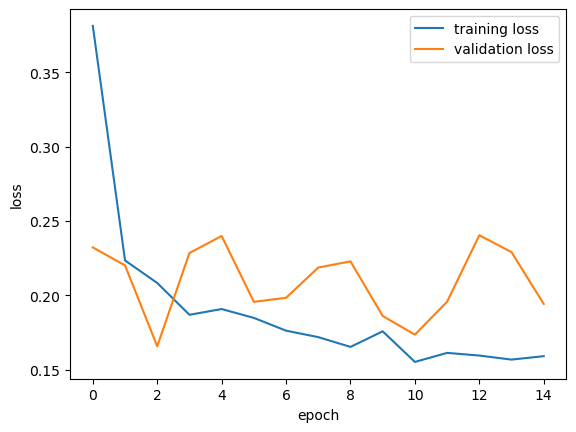

In [10]:
plt.plot(running_loss_history, label = 'training loss') #perturbed loss 
plt.plot(val_running_loss_history, label = 'validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

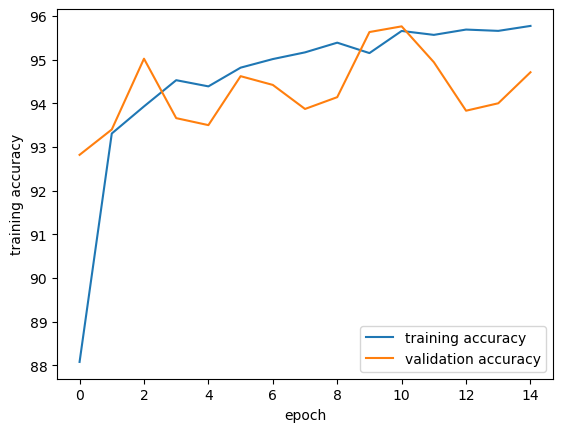

In [11]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_corrects_history, label = 'validation accuracy')
plt.xlabel('epoch')
plt.ylabel('training accuracy')
plt.legend()